In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import sys

# Redirect standard output to a variable
original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Restore the original standard output
sys.stdout = original_stdout

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


In [3]:
!pip install spacy
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.0
    Uninstalling en-core-web-sm-3.7.0:
      Successfully uninstalled en-core-web-sm-3.7.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')


# Load and Read the dataset

In [5]:
import os
import json
import pandas as pd

In [6]:
root_directory = "/kaggle/input/math-dataset/MATH/train"

In [7]:
problems = []
levels = []
types = []

In [8]:
for subdir, _, files in os.walk(root_directory):
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(subdir, file)
            with open(file_path, "r") as json_file:
                data = json.load(json_file)
                problems.append(data["problem"])
                levels.append(data["level"])
                types.append(data["type"])


In [9]:
data_dict = {
    "problem": problems,
    "level": levels,
    "type": types
}

df = pd.DataFrame(data_dict)


In [10]:
df.head()

,problem,level,type
0,The United States Postal Service charges an ex...,Level 3,Prealgebra
1,How many integers between 1000 and 2000 have a...,Level 4,Prealgebra
2,"Given that $n$ is an integer and $0 < 4n <30$,...",Level 2,Prealgebra
3,How many integers between $100$ and $150$ have...,Level 4,Prealgebra
4,Regular pentagon $ABCDE$ and regular hexagon $...,Level 4,Prealgebra


In [11]:
df['problem'] = df['problem'].str.lower()

In [12]:
df['Difficulty_level'] = df['level'].replace({
    'Level 1': 1,
    'Level 2': 2,
    'Level 3': 3,
    'Level 4': 4,
    'Level 5': 5
})


In [13]:
df['Difficulty_level'].value_counts()

Difficulty_level
5          2304
4          1690
3          1592
2          1348
1           564
Level ?       2
Name: count, dtype: int64

In [14]:
#Removing the 2 values without Level encoding
df = df[df['Difficulty_level'] != 'Level ?']

In [15]:
df['Difficulty_level'].value_counts()

Difficulty_level
5    2304
4    1690
3    1592
2    1348
1     564
Name: count, dtype: int64

In [16]:
df['type'].value_counts()

type
Algebra                   1744
Intermediate Algebra      1295
Prealgebra                1205
Number Theory              869
Geometry                   868
Counting & Probability     771
Precalculus                746
Name: count, dtype: int64

In [17]:
#Seeing the the count of Algebra problems
count_algebra = (df['type'].str.contains('algebra', case=False)).sum()
count_algebra

4244

In [18]:
import pandas as pd

# Filter rows where 'type' is 'algebra'
algebra_df = df[df['type'].str.contains('algebra', case=False)]
print(algebra_df.shape)
# Export the filtered DataFrame to a new CSV file
algebra_df.to_csv('algebra_problems_v1.csv', index=False)

(4244, 4)


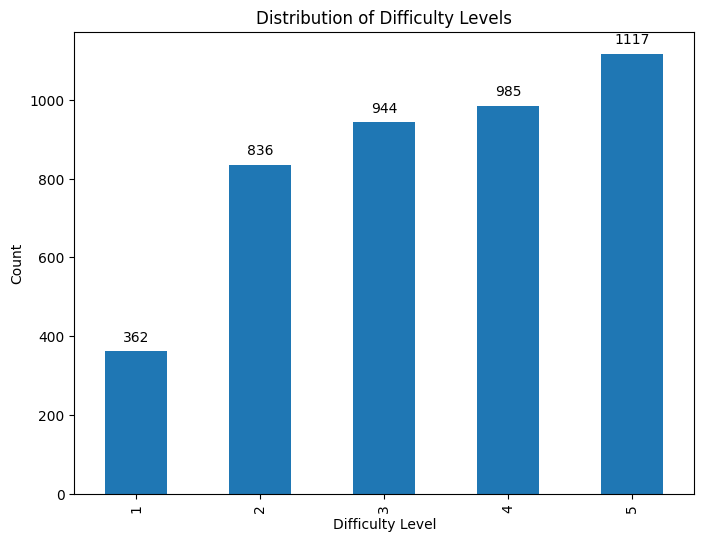

In [19]:
import matplotlib.pyplot as plt

# Group the data by 'Difficulty_level' and count the occurrences of each level
difficulty_counts = algebra_df['Difficulty_level'].value_counts().loc[[1, 2, 3, 4, 5]]

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = difficulty_counts.plot(kind='bar')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')

# Show the plot
plt.show()


In [20]:
#Adding ID column to Dataframe
import pandas as pd

algebra_df.insert(0, 'ID', range(1, len(algebra_df) + 1))

# Display the updated DataFrame
print(algebra_df)


        ID                                            problem    level  \
0        1  the united states postal service charges an ex...  Level 3   
1        2  how many integers between 1000 and 2000 have a...  Level 4   
2        3  given that $n$ is an integer and $0 < 4n <30$,...  Level 2   
3        4  how many integers between $100$ and $150$ have...  Level 4   
4        5  regular pentagon $abcde$ and regular hexagon $...  Level 4   
...    ...                                                ...      ...   
7495  4240  let $z$ be a complex number with $|z| = \sqrt{...  Level 5   
7496  4241  let $a$ and $b$ be real numbers.  find the max...  Level 4   
7497  4242  in the complex plane, $z,$ $z^2,$ $z^3$ form, ...  Level 5   
7498  4243  there is a smallest positive real number $a$ s...  Level 5   
7499  4244  a function $f$ has domain $[0,2]$ and range $[...  Level 3   

                      type Difficulty_level  
0               Prealgebra                3  
1               Pre

In [21]:
# Creating a new 'Question' column and copying 'problem' values
algebra_df['OriginalQuestion'] = algebra_df['problem']

In [22]:
# Creating a new 'Question' column and copying 'problem' values
algebra_df.head()

,ID,problem,level,type,Difficulty_level,OriginalQuestion
0,1,the united states postal service charges an ex...,Level 3,Prealgebra,3,the united states postal service charges an ex...
1,2,how many integers between 1000 and 2000 have a...,Level 4,Prealgebra,4,how many integers between 1000 and 2000 have a...
2,3,"given that $n$ is an integer and $0 < 4n <30$,...",Level 2,Prealgebra,2,"given that $n$ is an integer and $0 < 4n <30$,..."
3,4,how many integers between $100$ and $150$ have...,Level 4,Prealgebra,4,how many integers between $100$ and $150$ have...
4,5,regular pentagon $abcde$ and regular hexagon $...,Level 4,Prealgebra,4,regular pentagon $abcde$ and regular hexagon $...


In [23]:
# replace few known latex symbols
import pandas as pd

# Replace \left, \right, \qqaud, [\asy], [asy], \times, \emph, \mbox{ cm}, and {\mathrm{th}} with the desired values
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\left', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\right', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\qqaud', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\[asy\]', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\[asy\]', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\times', '*', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\emph', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\mbox{ (.*?)}', r'\1', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\{(.*?)\\}\\^{\\mathrm{th}}', r'\1^th', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\$\$\s+', r'$$', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\s+\$\$', r'$$', regex=True)

# Display the updated DataFrame
print(algebra_df)


        ID                                            problem    level  \
0        1  the united states postal service charges an ex...  Level 3   
1        2  how many integers between 1000 and 2000 have a...  Level 4   
2        3  given that $n$ is an integer and $0 < 4n <30$,...  Level 2   
3        4  how many integers between $100$ and $150$ have...  Level 4   
4        5  regular pentagon $abcde$ and regular hexagon $...  Level 4   
...    ...                                                ...      ...   
7495  4240  let $z$ be a complex number with $|z| = \sqrt{...  Level 5   
7496  4241  let $a$ and $b$ be real numbers.  find the max...  Level 4   
7497  4242  in the complex plane, $z,$ $z^2,$ $z^3$ form, ...  Level 5   
7498  4243  there is a smallest positive real number $a$ s...  Level 5   
7499  4244  a function $f$ has domain $[0,2]$ and range $[...  Level 3   

                      type Difficulty_level  \
0               Prealgebra                3   
1               P

In [24]:
# Find rows with blank values in the 'problem' column
blank_rows = algebra_df[algebra_df['problem'].str.strip() == '']

# Get the number of rows with blank values
blank_count = len(blank_rows)

# Display the row numbers of rows with blank values
if blank_count > 0:
    blank_row_numbers = blank_rows.index
    print(f"Number of Rows with Blank Values: {blank_count}")
    print(f"Row Numbers with Blank Values: {list(blank_row_numbers)}")
else:
    print("No Rows with Blank Values")


No Rows with Blank Values


In [26]:
import pandas as pd
import re

# Initialize an empty list to store dictionaries with extracted attributes
question_attributes = []

# Define regex patterns for matching
number_pattern = r'(?:(?<=\D)|^)(\d+(?:\.\d+)?)(?:(?=\D)|$)'
equation_pattern = r'(>=|<=|=)'
math_symbol_pattern = r'[+*/^<>]+|-(?![\-])|\\angle|\\circ|\dot|\rceil|\\lceil|\\cdot|\\sqrt|\\frac|\\lfloor|\\rfloor|\\rfrac|\\lfrac'

variable_pattern = r'\b[a-zA-Z]{3,}\b'

# Iterate through questions and extract attributes
for index, row in algebra_df.iterrows():
    question = row['problem']
    difficulty_level = row['Difficulty_level'] 
    ID = row['ID']  

    question_dict = {}  # Create a dictionary to store attributes for this question

    # Extract numbers and their lengths
    number_matches = re.findall(number_pattern, question)
    question_dict['Numbers'] = number_matches

    # Extract equations and their count
    equation_matches = re.findall(equation_pattern, question)
    question_dict['Math_Equations'] = equation_matches
    question_dict['Equation_Count'] = len(equation_matches)

    # Extract math symbols
    math_symbol_matches = re.findall(math_symbol_pattern, question)
    question_dict['Math_Symbols'] = math_symbol_matches

    # Extract and store unique variables
    variable_matches = re.findall(variable_pattern, question)
    unique_variables = list(set(variable_matches))  # Convert to a list to maintain order
    question_dict['Variables'] = unique_variables

    # Store the question, its attributes, and difficulty level in the dictionary
    question_dict['ID'] = ID
    question_dict['Question'] = question
    question_dict['Difficulty_level'] = difficulty_level

    question_attributes.append(question_dict)

# Convert the list of dictionaries into a DataFrame
ExtractedFeatures = pd.DataFrame(question_attributes)

# Display the DataFrame
print(ExtractedFeatures)


                                                Numbers Math_Equations  \
0       [0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]             []   
1                              [1000, 2000, 15, 20, 25]             []   
2                                            [0, 4, 30]             []   
3                                       [100, 150, 129]             []   
4     [0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...             []   
...                                                 ...            ...   
4239                                       [2, 1, 2, 1]            [=]   
4240                                                 []             []   
4241                                             [2, 3]             []   
4242                                             [3, 2]             []   
4243                                 [0, 2, 0, 1, 1, 1]            [=]   

      Equation_Count                                       Math_Symbols  \
0                  0                

In [27]:
ExtractedFeatures['Wordcount'] = ExtractedFeatures['Variables'].apply(len)


In [28]:
ExtractedFeatures.dtypes

Numbers             object
Math_Equations      object
Equation_Count       int64
Math_Symbols        object
Variables           object
ID                   int64
Question            object
Difficulty_level     int64
Wordcount            int64
dtype: object

In [29]:
#Deleting question Column
# Drop the 'Question' column from df1
ExtractedFeatures.drop(columns=['Question'], inplace=True)

In [30]:
import pandas as pd

file_path = "/kaggle/input/algebra-vocab-list/AlgebraVocab.csv"

# Load the CSV file into a DataFrame
Algebra_Vocab = pd.read_csv(file_path)


In [31]:
Algebra_Vocab.head()

,MATH VOCAB
0,system of equations
1,inequality
2,expression
3,perfect cubes
4,factorization


In [32]:
import pandas as pd

# Create a set of math vocabulary words from the loaded CSV file
math_vocab_set = set(Algebra_Vocab['MATH VOCAB'])

# Function to find math vocabulary in a given text
def find_math_vocab(text):
    # Split the text into words and convert to lowercase for case-insensitive matching
    words = text.split()
    math_vocab_found = [word for word in words if word.lower() in math_vocab_set]
    return math_vocab_found

# Create the 'MATH VOCABulary' column in 'algebra_df'
algebra_df['MATH Vocabulary'] = algebra_df['problem'].apply(find_math_vocab)

# Display the modified DataFrame
print(algebra_df)


        ID                                            problem    level  \
0        1  the united states postal service charges an ex...  Level 3   
1        2  how many integers between 1000 and 2000 have a...  Level 4   
2        3  given that $n$ is an integer and $0 < 4n <30$,...  Level 2   
3        4  how many integers between $100$ and $150$ have...  Level 4   
4        5  regular pentagon $abcde$ and regular hexagon $...  Level 4   
...    ...                                                ...      ...   
7495  4240  let $z$ be a complex number with $|z| = \sqrt{...  Level 5   
7496  4241  let $a$ and $b$ be real numbers.  find the max...  Level 4   
7497  4242  in the complex plane, $z,$ $z^2,$ $z^3$ form, ...  Level 5   
7498  4243  there is a smallest positive real number $a$ s...  Level 5   
7499  4244  a function $f$ has domain $[0,2]$ and range $[...  Level 3   

                      type Difficulty_level  \
0               Prealgebra                3   
1               P

In [33]:
# Merge 'MATH Vocabulary' from algebra_df based on 'ID'
ExtractedFeatures = ExtractedFeatures.merge(algebra_df[['ID', 'MATH Vocabulary']], on='ID', how='left')

# Display the modified DataFrame
print(ExtractedFeatures.head())
print(ExtractedFeatures.shape)

                                             Numbers Math_Equations  \
0    [0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]             []   
1                           [1000, 2000, 15, 20, 25]             []   
2                                         [0, 4, 30]             []   
3                                    [100, 150, 129]             []   
4  [0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...             []   

   Equation_Count                                       Math_Symbols  \
0               0                                                 []   
1               0                                                 []   
2               0                                             [<, <]   
3               0                                                 []   
4               0  [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...   

                                           Variables  ID  Difficulty_level  \
0  [inches, the, for, must, service, many, how, h...   1      

In [34]:

# Check for null or NaN values in the merged_dataframe
null_values = ExtractedFeatures.isnull().sum()

# Display the count of null values for each column
print(null_values)


Numbers             0
Math_Equations      0
Equation_Count      0
Math_Symbols        0
Variables           0
ID                  0
Difficulty_level    0
Wordcount           0
MATH Vocabulary     0
dtype: int64


In [35]:
# Define keywords for Tabular and Diagram questions
tabular_keywords = ['table', 'tabular']
diagram_keywords = ['draw', 'plot', 'graph','label']
# Create "Tabular Question" column
ExtractedFeatures['Tabular Question'] = ExtractedFeatures['Variables'].apply(lambda x: 'Yes' if any(keyword in x for keyword in tabular_keywords) else 'No')

# Create "Diagram" column
ExtractedFeatures['Diagram'] = ExtractedFeatures['Variables'].apply(lambda x: 'Yes' if any(keyword in x for keyword in diagram_keywords) else 'No')

# Display the updated DataFrame
print(ExtractedFeatures.head())


                                             Numbers Math_Equations  \
0    [0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]             []   
1                           [1000, 2000, 15, 20, 25]             []   
2                                         [0, 4, 30]             []   
3                                    [100, 150, 129]             []   
4  [0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...             []   

   Equation_Count                                       Math_Symbols  \
0               0                                                 []   
1               0                                                 []   
2               0                                             [<, <]   
3               0                                                 []   
4               0  [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...   

                                           Variables  ID  Difficulty_level  \
0  [inches, the, for, must, service, many, how, h...   1      

In [36]:
print("Value counts for Tabular Question:\n",ExtractedFeatures['Tabular Question'].value_counts())

Value counts for Tabular Question:
 Tabular Question
No     4216
Yes      28
Name: count, dtype: int64


In [37]:
print("Value counts for Diagram:\n",ExtractedFeatures['Diagram'].value_counts())

Value counts for Diagram:
 Diagram
No     3895
Yes     349
Name: count, dtype: int64


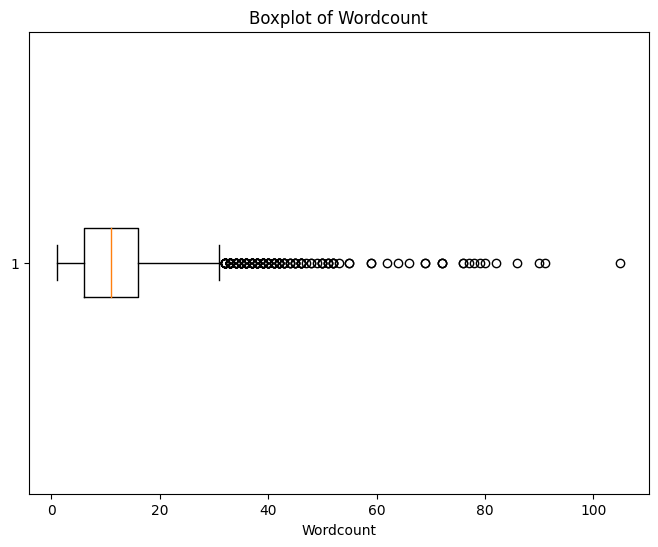

Q1: 6.0
Median (Q2): 11.0
Q3: 16.0
IQR: 10.0
Minimum Value: 1
Maximum Value: 105
80th Percentile Value: 18.0
85th Percentile Value: 20.0
90th Percentile Value: 24.0


In [38]:
import matplotlib.pyplot as plt

# Create a boxplot of the 'variable_count' column
plt.figure(figsize=(8, 6))
plt.boxplot(ExtractedFeatures['Wordcount'], vert=False)

# Add labels and title
plt.xlabel('Wordcount')
plt.title('Boxplot of Wordcount')

# Show the plot
plt.show()

# Calculate quartiles Q1, Q2 (median), Q3, IQR, min, and max values
q1 = ExtractedFeatures['Wordcount'].quantile(0.25)
q2 = ExtractedFeatures['Wordcount'].median()
q3 = ExtractedFeatures['Wordcount'].quantile(0.75)
iqr = q3 - q1
min_value = ExtractedFeatures['Wordcount'].min()
max_value = ExtractedFeatures['Wordcount'].max()

print(f'Q1: {q1}')
print(f'Median (Q2): {q2}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')
print(f'Minimum Value: {min_value}')
print(f'Maximum Value: {max_value}')
# Calculate the value at the 80th percentile
percentile_80 = ExtractedFeatures['Wordcount'].quantile(0.8)
percentile_85 = ExtractedFeatures['Wordcount'].quantile(0.85)
percentile_90 = ExtractedFeatures['Wordcount'].quantile(0.9)
print(f'80th Percentile Value: {percentile_80}')
print(f'85th Percentile Value: {percentile_85}')
print(f'90th Percentile Value: {percentile_90}')


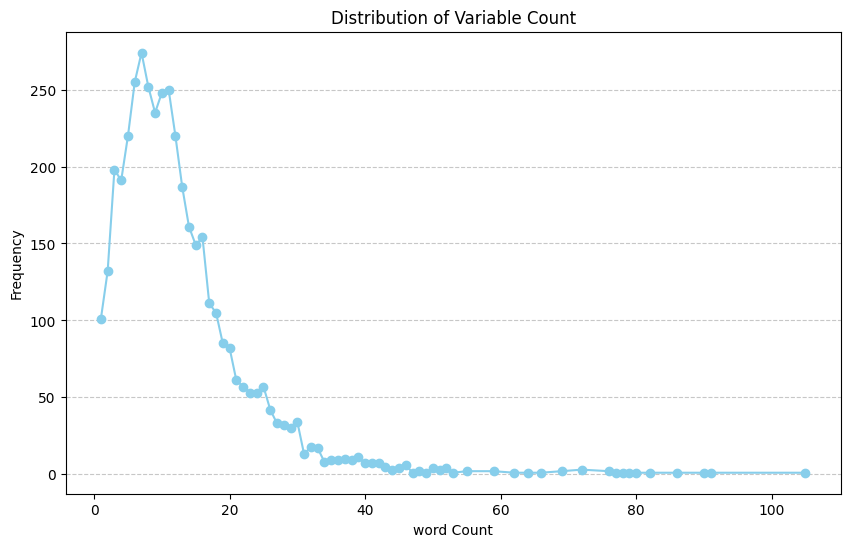

In [39]:
import matplotlib.pyplot as plt

# Assuming 'variable count' is the name of the column in ExtractedFeatures
variable_count = ExtractedFeatures['Wordcount']

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(variable_count.value_counts().sort_index(), marker='o', linestyle='-', color='skyblue')
plt.title('Distribution of Variable Count')
plt.xlabel('word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


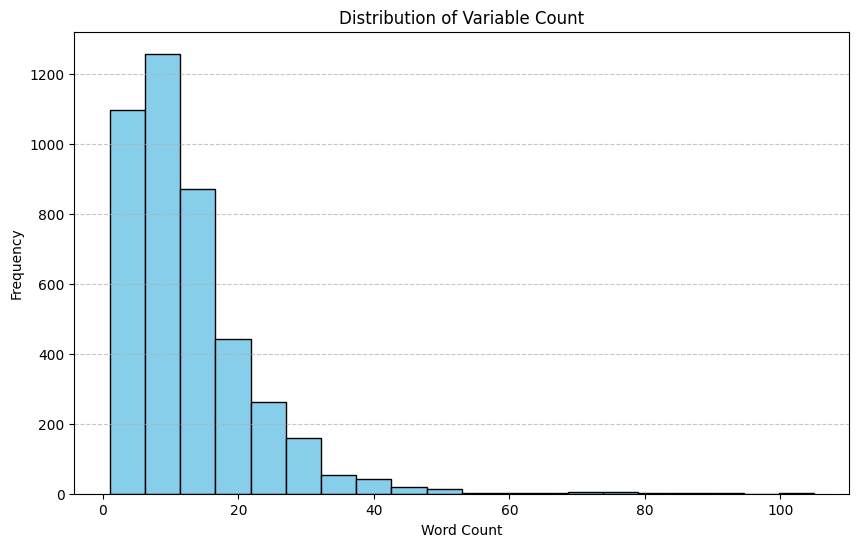

In [40]:
import matplotlib.pyplot as plt

# Assuming 'variable count' is the name of the column in ExtractedFeatures
variable_count = ExtractedFeatures['Wordcount']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(variable_count, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Variable Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [41]:
# Filter rows where 'variable count' is less than or equal to 25
Final_Extracted_Features = ExtractedFeatures[ExtractedFeatures['Wordcount'] <= 25]
Final_Extracted_Features.head()

,Numbers,Math_Equations,Equation_Count,Math_Symbols,Variables,ID,Difficulty_level,Wordcount,MATH Vocabulary,Tabular Question,Diagram
1,"[1000, 2000, 15, 20, 25]",[],0,[],"[integers, between, factors, three, and, have,...",2,4,11,"[three, numbers]",No,No
2,"[0, 4, 30]",[],0,"[<, <]","[values, and, given, what, integer, the, sum, ...",3,2,10,"[given, integer, sum, integer, values]",No,No
3,"[100, 150, 129]",[],0,[],"[one, integers, between, different, digits, th...",4,4,14,"[three, digits, increasing, one, integer]",No,No
5,"[30, 1.5, 1]",[],0,[],"[the, sydney, determine, damage, number, ameri...",6,4,19,[number],No,No
6,"[4, 1, 4, 5, 5, 7, 8]",[],0,[-],"[each, the, must, many, how, positive, two, ex...",7,5,20,"[positive, first, two, digits, two, digits, tw...",No,No


In [42]:
Final_Extracted_Features.shape

(3891, 11)

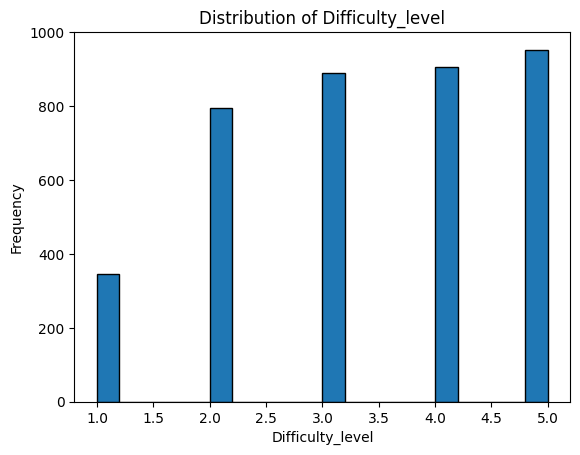

Skewness of Difficulty_level: -0.2136934827926766


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Final_Extracted_Features' is your DataFrame
target_column = 'Difficulty_level'

# Check skewness
skewness = Final_Extracted_Features[target_column].skew()

# Create a histogram to visualize the distribution
plt.hist(Final_Extracted_Features[target_column], bins=20, edgecolor='k')
plt.title(f'Distribution of {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frequency')
plt.show()

# Output the skewness value
print(f'Skewness of {target_column}: {skewness}')


In [44]:
# Create a new column 'Math_Symbols_Count' in the 'Final_Extracted_Features' DataFrame
Final_Extracted_Features['Math_Symbols_Count'] = Final_Extracted_Features['Math_Symbols'].apply(lambda x: len(x))


In [45]:
# Create a new column 'Math_Symbols_Count' in the 'Final_Extracted_Features' DataFrame
Final_Extracted_Features['MATH_Vocabulary_Count'] = Final_Extracted_Features['MATH Vocabulary'].apply(lambda x: len(x))


In [46]:
#Deleting redundant Column

Final_Extracted_Features.drop(columns=['Math_Equations','Math_Symbols','Variables','MATH Vocabulary'], inplace=True)

In [47]:
Final_Extracted_Features.head()

,Numbers,Equation_Count,ID,Difficulty_level,Wordcount,Tabular Question,Diagram,Math_Symbols_Count,MATH_Vocabulary_Count
1,"[1000, 2000, 15, 20, 25]",0,2,4,11,No,No,0,2
2,"[0, 4, 30]",0,3,2,10,No,No,2,5
3,"[100, 150, 129]",0,4,4,14,No,No,0,5
5,"[30, 1.5, 1]",0,6,4,19,No,No,0,1
6,"[4, 1, 4, 5, 5, 7, 8]",0,7,5,20,No,No,1,8


In [48]:
# Define a function to count and remove decimal numbers
def count_and_remove_decimal_numbers(numbers_list):
    decimal_count = sum(1 for num in numbers_list if '.' in str(num))
    # Remove decimal numbers from the list
    numbers_list = [num for num in numbers_list if '.' not in str(num)]
    return decimal_count, numbers_list

# Apply the function to create a new column and remove decimal numbers
Final_Extracted_Features[['Decimal_Num_Count', 'Numbers']] = Final_Extracted_Features['Numbers'].apply(count_and_remove_decimal_numbers).apply(pd.Series)

# Display the modified DataFrame
print(Final_Extracted_Features)


                       Numbers  Equation_Count    ID  Difficulty_level  \
1     [1000, 2000, 15, 20, 25]               0     2                 4   
2                   [0, 4, 30]               0     3                 2   
3              [100, 150, 129]               0     4                 4   
5                      [30, 1]               0     6                 4   
6        [4, 1, 4, 5, 5, 7, 8]               0     7                 5   
...                        ...             ...   ...               ...   
4239              [2, 1, 2, 1]               1  4240                 5   
4240                        []               0  4241                 4   
4241                    [2, 3]               0  4242                 5   
4242                    [3, 2]               0  4243                 5   
4243        [0, 2, 0, 1, 1, 1]               1  4244                 3   

      Wordcount Tabular Question Diagram  Math_Symbols_Count  \
1            11               No      No       

In [49]:
# Define functions to count occurrences
def count_single_digit(numbers_list):
    return sum(1 for num in numbers_list if 0 <= int(num) <= 9)

def count_double_digit(numbers_list):
    return sum(1 for num in numbers_list if 10 <= int(num) <= 99)

def count_triple_or_more(numbers_list):
    return sum(1 for num in numbers_list if int(num) >= 100)

# Apply the functions to create new columns
Final_Extracted_Features['Single_digit_number_count'] = Final_Extracted_Features['Numbers'].apply(count_single_digit)
Final_Extracted_Features['Double_digit_count'] = Final_Extracted_Features['Numbers'].apply(count_double_digit)
Final_Extracted_Features['Triple_digit_count'] = Final_Extracted_Features['Numbers'].apply(count_triple_or_more)

# Display the modified DataFrame
print(Final_Extracted_Features)


                       Numbers  Equation_Count    ID  Difficulty_level  \
1     [1000, 2000, 15, 20, 25]               0     2                 4   
2                   [0, 4, 30]               0     3                 2   
3              [100, 150, 129]               0     4                 4   
5                      [30, 1]               0     6                 4   
6        [4, 1, 4, 5, 5, 7, 8]               0     7                 5   
...                        ...             ...   ...               ...   
4239              [2, 1, 2, 1]               1  4240                 5   
4240                        []               0  4241                 4   
4241                    [2, 3]               0  4242                 5   
4242                    [3, 2]               0  4243                 5   
4243        [0, 2, 0, 1, 1, 1]               1  4244                 3   

      Wordcount Tabular Question Diagram  Math_Symbols_Count  \
1            11               No      No       

In [50]:
Final_Extracted_Features.columns

Index(['Numbers', 'Equation_Count', 'ID', 'Difficulty_level', 'Wordcount',
       'Tabular Question', 'Diagram', 'Math_Symbols_Count',
       'MATH_Vocabulary_Count', 'Decimal_Num_Count',
       'Single_digit_number_count', 'Double_digit_count',
       'Triple_digit_count'],
      dtype='object')

In [51]:
Final_Extracted_Features.drop(columns=['Numbers'], inplace=True)

In [52]:
Final_Extracted_Features = Final_Extracted_Features.merge(algebra_df[['ID', 'OriginalQuestion']], on='ID', how='inner')

In [53]:
Final_Extracted_Features.head()

,Equation_Count,ID,Difficulty_level,Wordcount,Tabular Question,Diagram,Math_Symbols_Count,MATH_Vocabulary_Count,Decimal_Num_Count,Single_digit_number_count,Double_digit_count,Triple_digit_count,OriginalQuestion
0,0,2,4,11,No,No,0,2,0,0,3,2,how many integers between 1000 and 2000 have a...
1,0,3,2,10,No,No,2,5,0,2,1,0,"given that $n$ is an integer and $0 < 4n <30$,..."
2,0,4,4,14,No,No,0,5,0,0,0,3,how many integers between $100$ and $150$ have...
3,0,6,4,19,No,No,0,1,1,1,1,0,"a storm in sydney, australia, caused $\$$30 mi..."
4,0,7,5,20,No,No,1,8,0,7,0,0,how many 4-digit positive integers exist that ...


In [54]:
# Reorder the columns in the desired order
Final_Extracted_Features = Final_Extracted_Features[[
    'ID', 'Equation_Count', 'Wordcount', 'MATH_Vocabulary_Count', 'Tabular Question', 'Diagram',
    'Math_Symbols_Count', 'Decimal_Num_Count', 'Single_digit_number_count',
    'Double_digit_count', 'Triple_digit_count', 'Difficulty_level','OriginalQuestion'
]]

print(Final_Extracted_Features.head())

   ID  Equation_Count  Wordcount  MATH_Vocabulary_Count Tabular Question  \
0   2               0         11                      2               No   
1   3               0         10                      5               No   
2   4               0         14                      5               No   
3   6               0         19                      1               No   
4   7               0         20                      8               No   

  Diagram  Math_Symbols_Count  Decimal_Num_Count  Single_digit_number_count  \
0      No                   0                  0                          0   
1      No                   2                  0                          2   
2      No                   0                  0                          0   
3      No                   0                  1                          1   
4      No                   1                  0                          7   

   Double_digit_count  Triple_digit_count  Difficulty_level  \
0    

In [55]:
Final_Extracted_Features.to_csv('Final_Extracted_Features.csv', index=False)

In [56]:
#Deleting redundant Column

Final_Extracted_Features.drop(columns=['OriginalQuestion','ID'], inplace=True)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Encoding binary columns
Final_Extracted_Features['Tabular Question'] = Final_Extracted_Features['Tabular Question'].map({'Yes': 1, 'No': 0})
Final_Extracted_Features['Diagram'] = Final_Extracted_Features['Diagram'].map({'Yes': 1, 'No': 0})



In [58]:
Final_Extracted_Features_v1 = Final_Extracted_Features.copy()

In [59]:
Final_Extracted_Features.head()

,Equation_Count,Wordcount,MATH_Vocabulary_Count,Tabular Question,Diagram,Math_Symbols_Count,Decimal_Num_Count,Single_digit_number_count,Double_digit_count,Triple_digit_count,Difficulty_level
0,0,11,2,0,0,0,0,0,3,2,4
1,0,10,5,0,0,2,0,2,1,0,2
2,0,14,5,0,0,0,0,0,0,3,4
3,0,19,1,0,0,0,1,1,1,0,4
4,0,20,8,0,0,1,0,7,0,0,5


In [60]:
Final_Extracted_Features['Difficulty_level'].value_counts()

Difficulty_level
5    953
4    907
3    890
2    796
1    345
Name: count, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Difficulty_level' using LabelEncoder
label_encoder = LabelEncoder()
Final_Extracted_Features['Difficulty_level_encoded'] = label_encoder.fit_transform(Final_Extracted_Features['Difficulty_level'])

In [62]:
y = Final_Extracted_Features['Difficulty_level_encoded']

In [63]:
columns_to_drop = ['Difficulty_level','Difficulty_level_encoded']
Final_Extracted_Features.drop(columns=columns_to_drop, inplace=True)

In [64]:
# Check for null or NaN values in the merged_dataframe
null_values = Final_Extracted_Features.isnull().sum()

# Display the count of null values for each column
print(null_values)


Equation_Count               0
Wordcount                    0
MATH_Vocabulary_Count        0
Tabular Question             0
Diagram                      0
Math_Symbols_Count           0
Decimal_Num_Count            0
Single_digit_number_count    0
Double_digit_count           0
Triple_digit_count           0
dtype: int64


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(Final_Extracted_Features, y, test_size = 0.3, random_state = 123, stratify=y)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape) 

Shapes
X_train: (2723, 10)
X_test: (1168, 10)
y_train: (2723,)
y_test: (1168,)


In [66]:
y_train.value_counts()

Difficulty_level_encoded
4    667
3    635
2    623
1    557
0    241
Name: count, dtype: int64

In [67]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression
Logmodel = LogisticRegression(solver='lbfgs',multi_class='ovr', max_iter=100)

Logmodel.fit(X_train,y_train)

train_pred=Logmodel.predict(X_train)
test_pred=Logmodel.predict(X_test)
from sklearn.metrics import classification_report
# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.33      0.57      0.42       239
           2       0.28      0.25      0.26       267
           3       0.29      0.10      0.14       272
           4       0.42      0.62      0.50       286

    accuracy                           0.35      1168
   macro avg       0.26      0.31      0.26      1168
weighted avg       0.30      0.35      0.30      1168



In [69]:
from sklearn.metrics import classification_report

# Build SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.32      0.64      0.43       239
           2       0.31      0.28      0.30       267
           3       0.33      0.15      0.21       272
           4       0.45      0.51      0.48       286

    accuracy                           0.36      1168
   macro avg       0.28      0.32      0.28      1168
weighted avg       0.32      0.36      0.32      1168



In [70]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


train_pred=classifier.predict(X_train)
test_pred=classifier.predict(X_test)
# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25       104
           1       0.30      0.07      0.11       239
           2       0.30      0.03      0.05       267
           3       0.24      0.79      0.36       272
           4       0.46      0.20      0.27       286

    accuracy                           0.27      1168
   macro avg       0.33      0.26      0.21      1168
weighted avg       0.33      0.27      0.21      1168



In [71]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate Model
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)

#Predict on test and train
train_pred = dtclf.predict(X_train)
test_pred = dtclf.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.30      0.28       104
           1       0.34      0.36      0.35       239
           2       0.24      0.24      0.24       267
           3       0.24      0.24      0.24       272
           4       0.37      0.35      0.36       286

    accuracy                           0.30      1168
   macro avg       0.29      0.30      0.29      1168
weighted avg       0.30      0.30      0.30      1168



In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
def hyperParameter_random_forest_model(X_train, X_test, y_train, y_test):
        
        rf = RandomForestClassifier()

        param_grid = {"min_samples_split" : [1,3,5],
                    "n_estimators" : [50,100,150],
                    'max_depth':[3,5,7],
                    "criterion": ["gini", "entropy"]}
        
        estimator = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5)
                

        # Fit the data using the best estimator found by the GridSearchCV object
        estimator.fit(X_train, y_train)
        
        # Make predictions using the best estimator
        train_predicts = estimator.predict(X_train)
        test_predicts = estimator.predict(X_test)
        print("best_params:",estimator.best_params_)
      # Evaluate the classifier
        print("Classification Report:")
        print(classification_report(y_test, test_predicts)) 

In [73]:
hyperParameter_random_forest_model(X_train, X_test, y_train, y_test)

best_params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.04      0.07       104
           1       0.34      0.55      0.42       239
           2       0.27      0.20      0.23       267
           3       0.28      0.13      0.18       272
           4       0.43      0.67      0.52       286

    accuracy                           0.35      1168
   macro avg       0.34      0.32      0.28      1168
weighted avg       0.33      0.35      0.31      1168



# Encoding difficulty Level column to 3 levels

In [74]:
Final_Extracted_Features_v1.head()

,Equation_Count,Wordcount,MATH_Vocabulary_Count,Tabular Question,Diagram,Math_Symbols_Count,Decimal_Num_Count,Single_digit_number_count,Double_digit_count,Triple_digit_count,Difficulty_level
0,0,11,2,0,0,0,0,0,3,2,4
1,0,10,5,0,0,2,0,2,1,0,2
2,0,14,5,0,0,0,0,0,0,3,4
3,0,19,1,0,0,0,1,1,1,0,4
4,0,20,8,0,0,1,0,7,0,0,5


In [75]:
Final_Extracted_Features_v1['Difficulty_level'] = Final_Extracted_Features_v1['Difficulty_level'].replace({
    1: 1,
    2: 1,
    3: 2,
    4: 3,
    5: 3
})

In [76]:
Final_Extracted_Features_v1['Difficulty_level'].value_counts()


Difficulty_level
3    1860
1    1141
2     890
Name: count, dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Difficulty_level' using LabelEncoder
label_encoder = LabelEncoder()
Final_Extracted_Features_v1['Difficulty_level_encoded'] = label_encoder.fit_transform(Final_Extracted_Features_v1['Difficulty_level'])

In [78]:
y = Final_Extracted_Features_v1['Difficulty_level_encoded']

In [79]:
columns_to_drop = ['Difficulty_level','Difficulty_level_encoded']
Final_Extracted_Features_v1.drop(columns=columns_to_drop, inplace=True)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(Final_Extracted_Features_v1, y, test_size = 0.3, random_state = 123, stratify=y)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape) 

Shapes
X_train: (2723, 10)
X_test: (1168, 10)
y_train: (2723,)
y_test: (1168,)


In [81]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
from sklearn.metrics import classification_report

# Build SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       343
           1       0.25      0.00      0.01       267
           2       0.59      0.80      0.68       558

    accuracy                           0.56      1168
   macro avg       0.45      0.47      0.41      1168
weighted avg       0.49      0.56      0.49      1168



In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the training and test sets
train_pred = classifier.predict(X_train)
test_pred = classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.57      0.54       343
           1       0.38      0.01      0.02       267
           2       0.59      0.83      0.69       558

    accuracy                           0.57      1168
   macro avg       0.50      0.47      0.42      1168
weighted avg       0.52      0.57      0.49      1168



In [84]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


train_pred=classifier.predict(X_train)
test_pred=classifier.predict(X_test)
# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       343
           1       0.14      0.03      0.04       267
           2       0.57      0.81      0.67       558

    accuracy                           0.54      1168
   macro avg       0.41      0.44      0.41      1168
weighted avg       0.46      0.54      0.48      1168



In [85]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate Model
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)

#Predict on test and train
train_pred = dtclf.predict(X_train)
test_pred = dtclf.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       343
           1       0.23      0.26      0.25       267
           2       0.59      0.54      0.56       558

    accuracy                           0.46      1168
   macro avg       0.43      0.43      0.43      1168
weighted avg       0.48      0.46      0.47      1168



In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
def hyperParameter_random_forest_model(X_train, X_test, y_train, y_test):
        
        rf = RandomForestClassifier()

        param_grid = {"min_samples_split" : [1,3,5],
                    "n_estimators" : [50,100,150],
                    'max_depth':[3,5,7],
                    "criterion": ["gini", "entropy"]}
        
        estimator = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5)
                

        # Fit the data using the best estimator found by the GridSearchCV object
        estimator.fit(X_train, y_train)
        
        # Make predictions using the best estimator
        train_predicts = estimator.predict(X_train)
        test_predicts = estimator.predict(X_test)
        print("best_params:",estimator.best_params_)
      # Evaluate the classifier
        print("Classification Report:")
        print(classification_report(y_test, test_predicts)) 

In [87]:
hyperParameter_random_forest_model(X_train, X_test, y_train, y_test)

best_params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.54      0.53       343
           1       0.29      0.01      0.01       267
           2       0.58      0.84      0.69       558

    accuracy                           0.56      1168
   macro avg       0.46      0.46      0.41      1168
weighted avg       0.50      0.56      0.49      1168

